In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns              
# Python Geospatial Data Library
import geopandas as gpd            
plt.style.use('fivethirtyeight')


file =pd.read_csv("Resources/CleanAirbnbData.csv")
data = pd.DataFrame(file)
# read data
data.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [2]:
print(max(data['Calculated Host Listings Count']))

327


In [3]:
# Check null value
data.isnull().sum()

ID                                   0
Name                                 4
Host ID                              0
Host Name                            8
Neighbourhood Group                  0
Neighbourhood                        0
Latitude                             0
Longitude                            0
Room Type                            0
Price                                0
Minimum Nights                       0
Number of Reviews                    0
Last Review                       5207
Reviews per Month                 5207
Calculated Host Listings Count       0
Availability                         0
dtype: int64

In [4]:
# summary of dataset
data.describe()

,ID,Host ID,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Calculated Host Listings Count,Availability
count,3.136200e+04,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,26155.000000,31362.000000,31362.000000
mean,2.100481e+07,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,1.810126,10.334067,175.831994
std,1.148631e+07,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,1.805707,40.700398,126.187636
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,1.167514e+07,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,2.254548e+07,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3.119407e+07,1.452145e+08,40.763030,-73.930133,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Cleaning up data.
# datadf.drop(['latitude'],axis=1, inplace=True)
# datadf.drop(['longitude'], axis=1, inplace=True)
# datadf.drop(['last_review'],axis=1, inplace=True)
# datadf.drop(['availability_365'],axis=1, inplace=True)
# datadf

In [6]:
# Host summary

In [7]:
host_count = len(data['Host ID'].unique())
id_count = len(data['ID'].unique())
host=pd.DataFrame({"Host Count":[host_count],"List ID count":[id_count]})
host

,Host Count,List ID count
0,21809,31362


In [8]:
mutiple_list_count=data['Host ID'].value_counts()
mutiple_list_count.describe()

count    21809.000000
mean         1.438030
std          3.549362
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: Host ID, dtype: float64

In [9]:
list_bins = [0,1,5, 10, 20,30,50,100,200,max(data['Calculated Host Listings Count'])]
list_group_names =['1_list','5 and under','10 and under','20 and under','30 and under','50 and under','100 and under','200 and under','201 and more']
data["List Categories"] = pd.cut(data["Calculated Host Listings Count"], list_bins, labels=list_group_names)
list_Demographics = pd.DataFrame(data["List Categories"].value_counts())
list_Demographics.reset_index()
total_list = len(data["ID"]) 
list_Demographics["Percentage of listing"]= round(list_Demographics["List Categories"]/ total_list *100,2)
# list_Demographics.rank(axis=0, numeric_only=False)
list_Demographics

,List Categories,Percentage of listing
1_list,17393,55.46
5 and under,9370,29.88
10 and under,1731,5.52
20 and under,712,2.27
201 and more,559,1.78
50 and under,556,1.77
100 and under,526,1.68
30 and under,302,0.96
200 and under,213,0.68


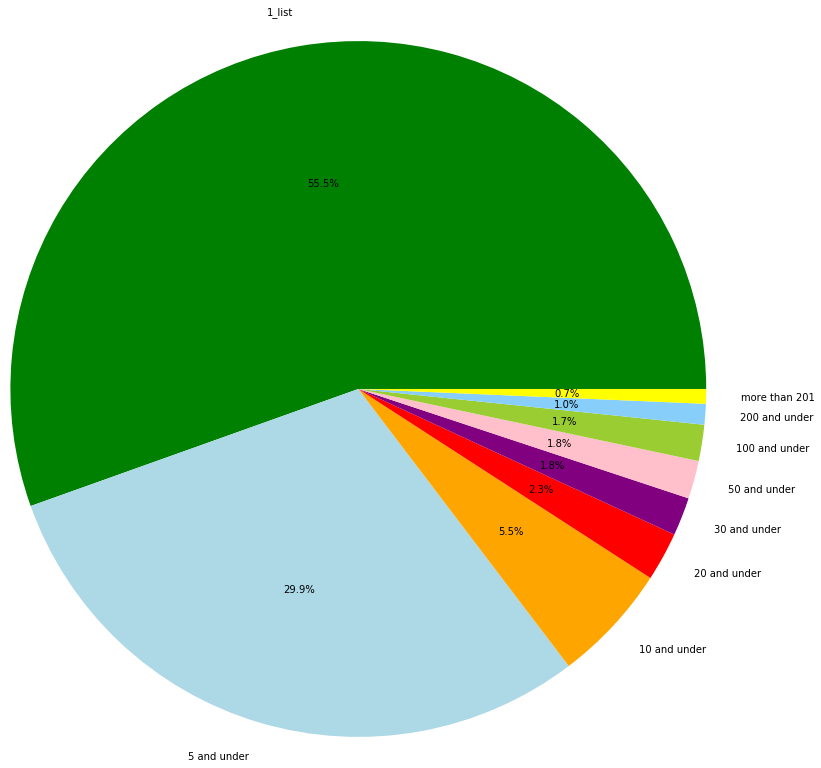

In [10]:
pies = ['1_list','5 and under','10 and under','20 and under','30 and under','50 and under','100 and under','200 and under','more than 201']
pie_votes = list_Demographics["Percentage of listing"]
#  why pct does not match with preview data??
colors = ["green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","yellow"]
plt.pie(pie_votes, labels=pies,colors=colors,autopct="%1.1f%%",radius=4)
plt.show()

<BarContainer object of 9 artists>

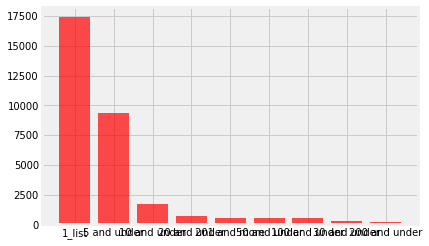

In [11]:
plt.bar( list_Demographics.index, list_Demographics["List Categories"],color='r',alpha=0.7,align ='center')

In [12]:
# price Demographics
min_p = min(data['Price'])
max_p = max(data['Price'])
mean_p = data['Price'].mean()
print(f'min price:{min_p}, max price:{max_p},mean_p:{mean_p}')


min price:0, max price:10000,mean_p:162.05047509725145


In [45]:
price_bins = [0,50,100,200,300,500,1000, max(data['Price'])]
price_group_names =["<$50","$51-100","$101-200","$201-300","$301-500","$501-1000",">$1001"]
data["Price categories"] = pd.cut(data["Price"], price_bins, labels=price_group_names)
data.head()
# price_Demographics = pd.DataFrame(data["Price categories"].value_counts())
# price_Demographics
# price_Demographics["list_price"]= round(price_Demographics["list_price"]/ total_list *100,2)
# list_Demographics["Percentage of listing"]= list_Demographics["Percentage of listing"].map("{:.2f}%".format)
# price_Demographics.rank(axis=0, numeric_only=False)
# price_Demographics

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability,List Categories,Price categories,list_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,10 and under,$101-200,$101-$200
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5 and under,$201-300,$201-$300
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1_list,$101-200,$101-$200
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1_list,$51-100,51-$100
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1_list,$101-200,$101-$200


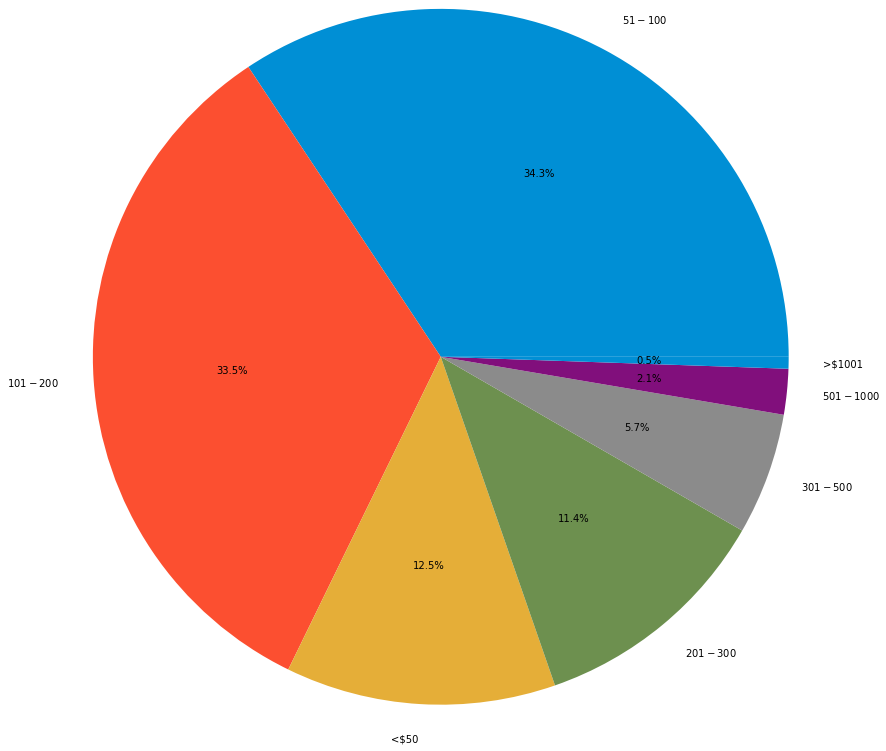

In [14]:
plt.pie(price_Demographics['list_price'],labels=price_Demographics.index,autopct="%1.1f%%",radius=4)
plt.show()

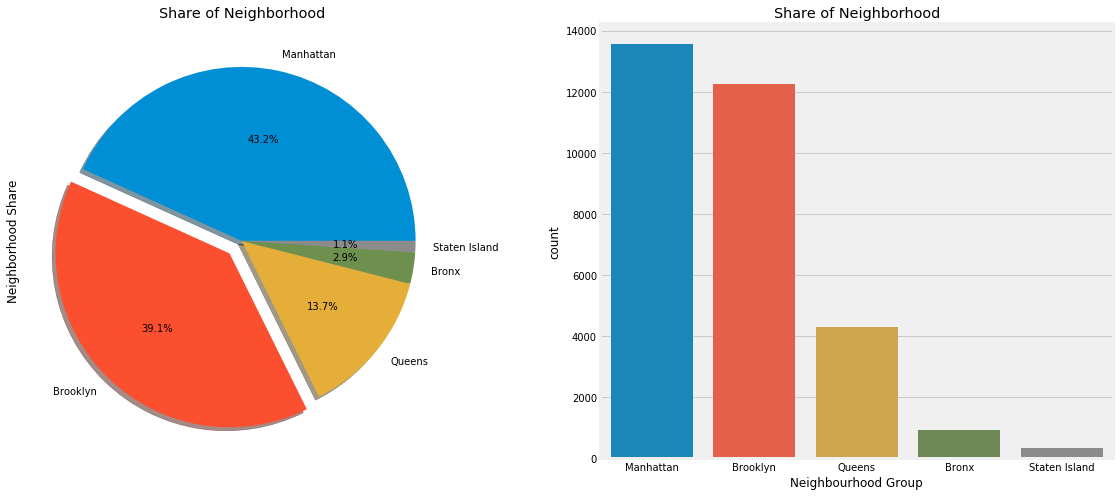

In [15]:
# Airbnb locations
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Neighbourhood Group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('Neighbourhood Group',data=data,ax=ax[1],order=data['Neighbourhood Group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

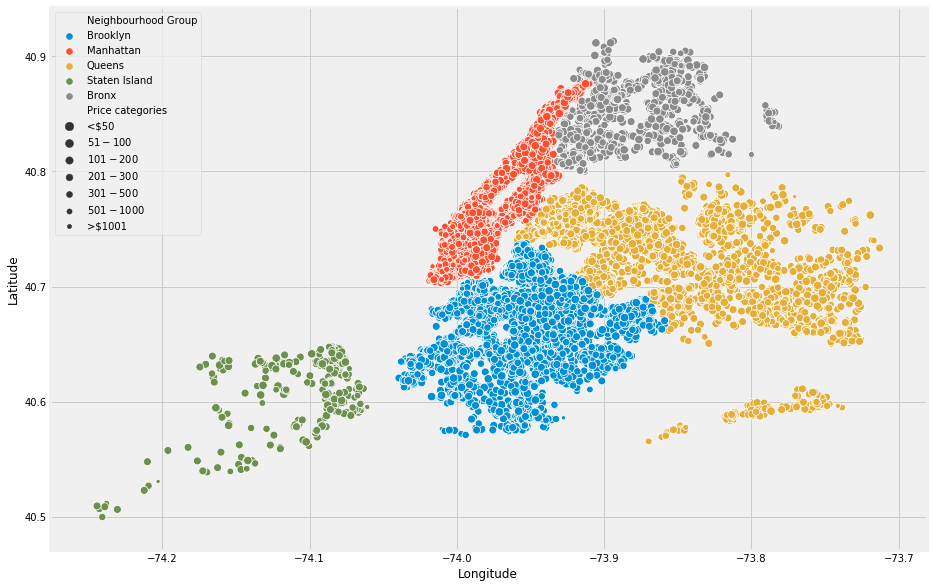

In [35]:
plt.figure(figsize=(14,10))
sns.scatterplot(data['Longitude'],data['Latitude'],hue =data[ "Neighbourhood Group"],size=data['Price categories'])
plt.show()

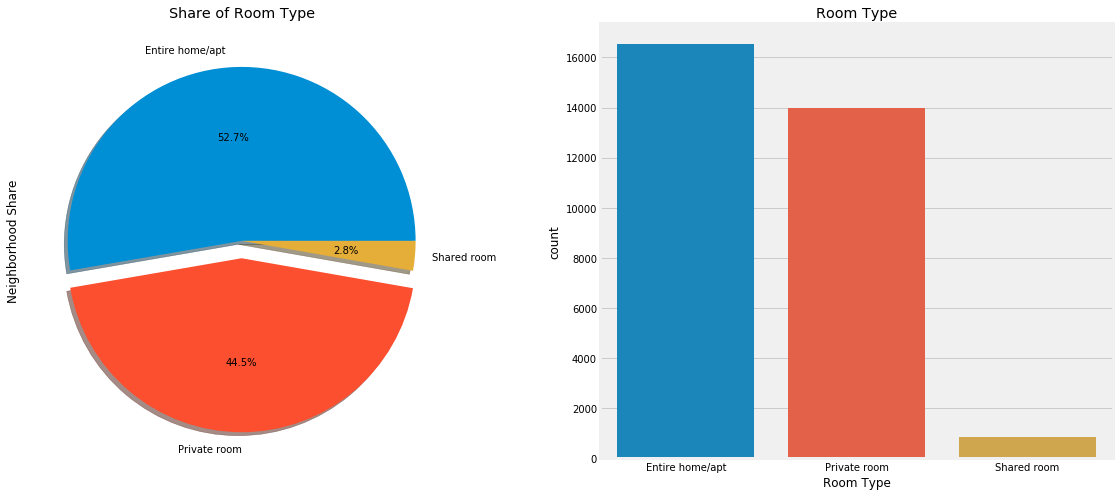

In [17]:
# Room Type
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Room Type'].value_counts().plot.pie(explode=[0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('Room Type',data=data,ax=ax[1],order=data['Room Type'].value_counts().index)
ax[1].set_title('Room Type')
plt.show()

In [18]:
area_mean=data.groupby('Neighbourhood Group').count()
area_mean


,ID,Name,Host ID,Host Name,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability,List Categories,Price categories,list_price
Neighbourhood Group,,,,,,,,,,,,,,,,,,
Bronx,914,913,914,913,914,914,914,914,914,914,914,756,756,914,914,914,913,913
Brooklyn,12260,12259,12260,12256,12260,12260,12260,12260,12260,12260,12260,10664,10664,12260,12260,12260,12253,12253
Manhattan,13559,13557,13559,13557,13559,13559,13559,13559,13559,13559,13559,10813,10813,13559,13559,13559,13559,13559
Queens,4298,4298,4298,4297,4298,4298,4298,4298,4298,4298,4298,3635,3635,4298,4298,4298,4298,4298
Staten Island,331,331,331,331,331,331,331,331,331,331,331,287,287,331,331,331,331,331


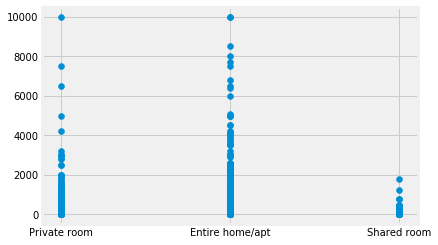

In [19]:
plt.scatter(data['Room Type'], data['Price'])


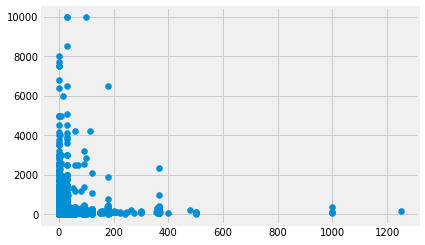

In [20]:
plt.scatter(data['Minimum Nights'], data['Price'])